In [248]:
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import candidate
import uproot
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import json
import hist
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

class MyProcessor(processor.ProcessorABC):
    def __init__(self):
        pass

    def process(self, events):
        print(events.jetadR)
        # dataset_axis = hist.axis.StrCategory([], growth=True, name="dataset", label="Primary dataset")
        # dR_axis = hist.axis.Regular(10, 0, 0.5, name="dR", label="Jet A dR")
        dataset = events.metadata['dataset']
        print("--------------------",events.jetPdgIds)
        jet = ak.zip(
            {
                "jetM": ak.flatten(events.jetM),
                "jetPt": ak.flatten(events.jetPt),
                "jetadR":ak.flatten(events.jetadR),
                "TaudR":ak.flatten(events.TaudR),
                "Tau1dR":ak.flatten(events.Tau1dR),
                "Tau2dR":ak.flatten(events.Tau2dR),
                "a_m": ak.flatten(events.a_m),
                "a_pt": ak.flatten(events.a_pt),
                "NrecoTaus": ak.flatten(events.NrecoTaus),
                "NGenTaus": ak.flatten(events.NGenTaus),
                
               
            },
            with_name="PtEtaPhiMCandidate",
            behavior=candidate.behavior,
         
        )
        
       
        jet_A_mass = (
            hist.Hist.new
            .StrCat(["jet_mass", "A_mass"], name="hmass")
            .Reg(26, 3.6, 14., name="mass", label="Mass [GeV]")
            .Int64()
        )
        
        
        
        jetmass = jet.jetM[jet.jetM > -22.22]
        jet_A_mass.fill(hmass="jet_mass", mass=jetmass)
        
        amass = jet.a_m[jet.a_m > -22.22]
        jet_A_mass.fill(hmass="A_mass", mass=amass)
        
        jet_A_pt = (
            hist.Hist.new
            .StrCat(["jet_pt", "A_pt"], name="hpt")
            .Reg(20, 30, 200, name="pt", label="Mass [GeV]")
            .Int64()
        )
        
        jetpt = jet.jetPt[jet.jetPt>-22.22]
        jet_A_pt.fill(hpt="jet_pt", pt=jetpt)
        
        apt = jet.a_pt[jet.a_pt>-22.22]
        jet_A_pt.fill(hpt="A_pt", pt=apt)
        
        
        jet_dR = (
            hist.Hist.new
            .StrCat(["tau_dr","tau1_dr", "tau2_dr","a_jet_dR"], name="hdR")
            .Reg(10, 0.0, 0.5, name="dr", label="dR")
            .Int64()
        )
        
        tau1dr = jet.Tau1dR[jet.Tau1dR>-22.22]
        jet_dR.fill(hdR="tau1_dr", dr=tau1dr)
        
        tau2dr = jet.Tau2dR[jet.Tau2dR>-22.22]
        jet_dR.fill(hdR="tau2_dr", dr=tau2dr)
                     
        taudr = jet.TaudR[jet.TaudR>-22.22]
        jet_dR.fill(hdR="tau_dr", dr=taudr)
                     
        adr = jet.jetadR[jet.jetadR>-22.22]
        jet_dR.fill(hdR="a_jet_dR", dr=adr)
        
        
        
        num_tau = (
                    hist.Hist.new
                    .StrCat(["gen_tau", "reco_tau"], name="htau")
                    .Reg(5, 0, 5., name="tau", label="Number of Tau")
                    .Int64()
                )
        
        
        
        gentau = jet.NGenTaus[jet.NGenTaus > -22.22]
        num_tau.fill(htau="gen_tau", tau=gentau)
        
        recotau = jet.NrecoTaus[jet.NrecoTaus > -22.22]
        num_tau.fill(htau="reco_tau", tau=recotau)
        
        return {
            dataset: {
                "entries": len(events),
                "jet_a_mass":jet_A_mass,
                "jet_a_pt":jet_A_pt,
                "dR":jet_dR,
                "num_tau":num_tau,
            }
        }

    def postprocess(self, accumulator):
        pass

In [249]:

filename = "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_999.root"
file = uproot.open(filename)
events = NanoEventsFactory.from_root(
    file,
    treepath='/fevt/RHTree',
    # "RHTree",
    entry_start=None,
    # entry_stop=1,
    metadata={"dataset": "jet"},
    schemaclass=BaseSchema,
).events()
p = MyProcessor()
out = p.process(events)
out

[[0.0831, 0.119], [0.0112, 0.0509], [0.028, ... 0.0309], [0.0712], [0.0112, 0.0389]]
-------------------- [[25, 25], [25, 25], [25, 25], [25], [25, ... [25, 25], [25, 25], [25], [25, 25]]


{'jet': {'entries': 335,
  'jet_a_mass': Hist(
    StrCategory(['jet_mass', 'A_mass'], name='hmass'),
    Regular(26, 3.6, 14, name='mass', label='Mass [GeV]'),
    storage=Int64()) # Sum: 897.0 (1052.0 with flow),
  'jet_a_pt': Hist(
    StrCategory(['jet_pt', 'A_pt'], name='hpt'),
    Regular(20, 30, 200, name='pt', label='Mass [GeV]'),
    storage=Int64()) # Sum: 1023.0 (1052.0 with flow),
  'dR': Hist(
    StrCategory(['tau_dr', 'tau1_dr', 'tau2_dr', 'a_jet_dR'], name='hdR'),
    Regular(10, 0, 0.5, name='dr', label='dR'),
    storage=Int64()) # Sum: 2104.0,
  'num_tau': Hist(
    StrCategory(['gen_tau', 'reco_tau'], name='htau'),
    Regular(5, 0, 5, name='tau', label='Number of Tau'),
    storage=Int64()) # Sum: 1052.0}}

In [252]:
hist1 = out["jet"]["num_tau"]
hist1


Hist(
  StrCategory(['gen_tau', 'reco_tau'], name='htau'),
  Regular(5, 0, 5, name='tau', label='Number of Tau'),
  storage=Int64()) # Sum: 1052.0

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

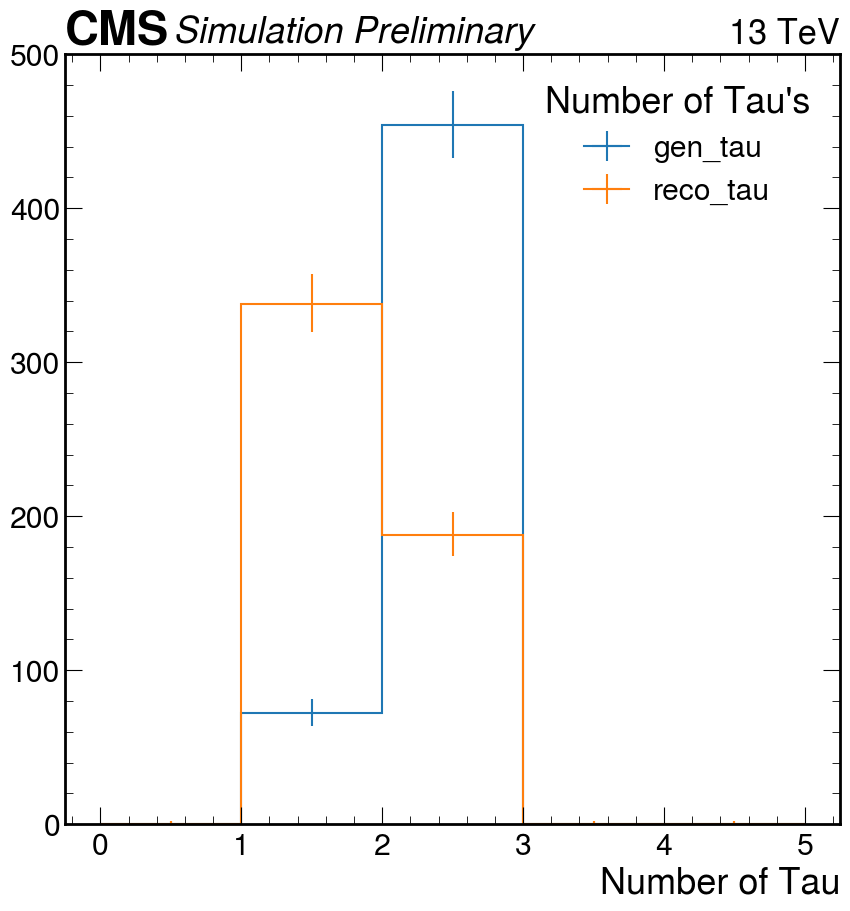

In [241]:
fig, ax = plt.subplots()
out["jet"]["num_tau"].plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="Number of Tau's")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

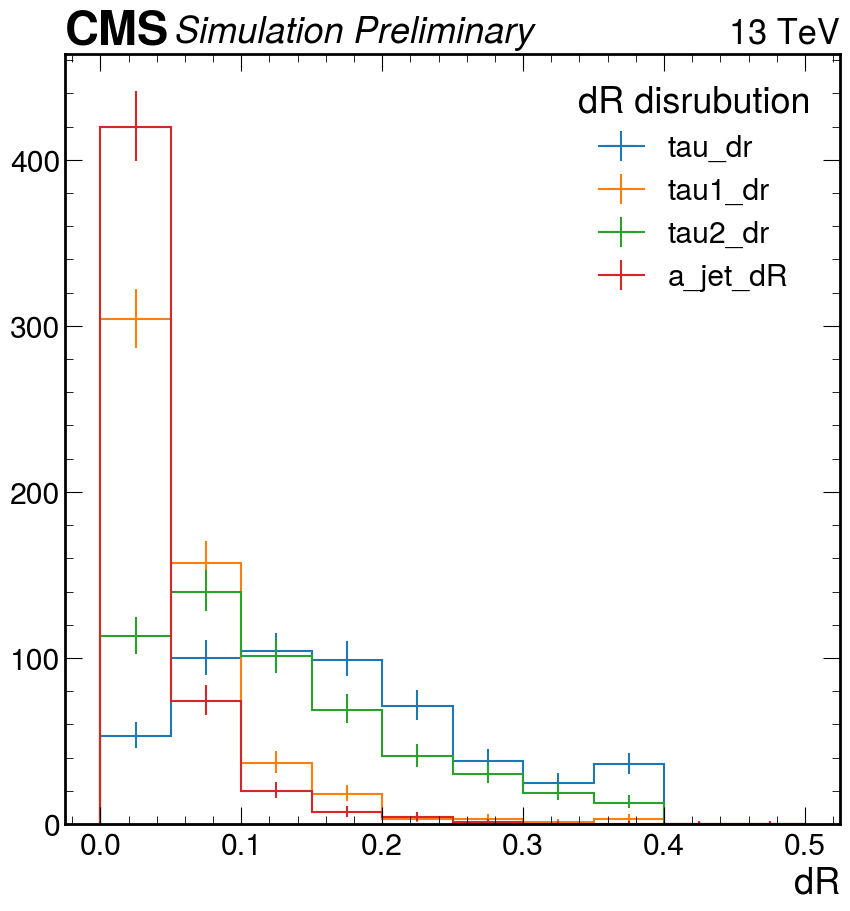

In [218]:
fig, ax = plt.subplots()
out["jet"]["dR"].plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="dR disrubution")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

ValueError: Size mismatch between "values" and "edges". Expected `len(values) + 1 == len(edges)`, but `len(values) = 40` and `len(edges) = 5`.

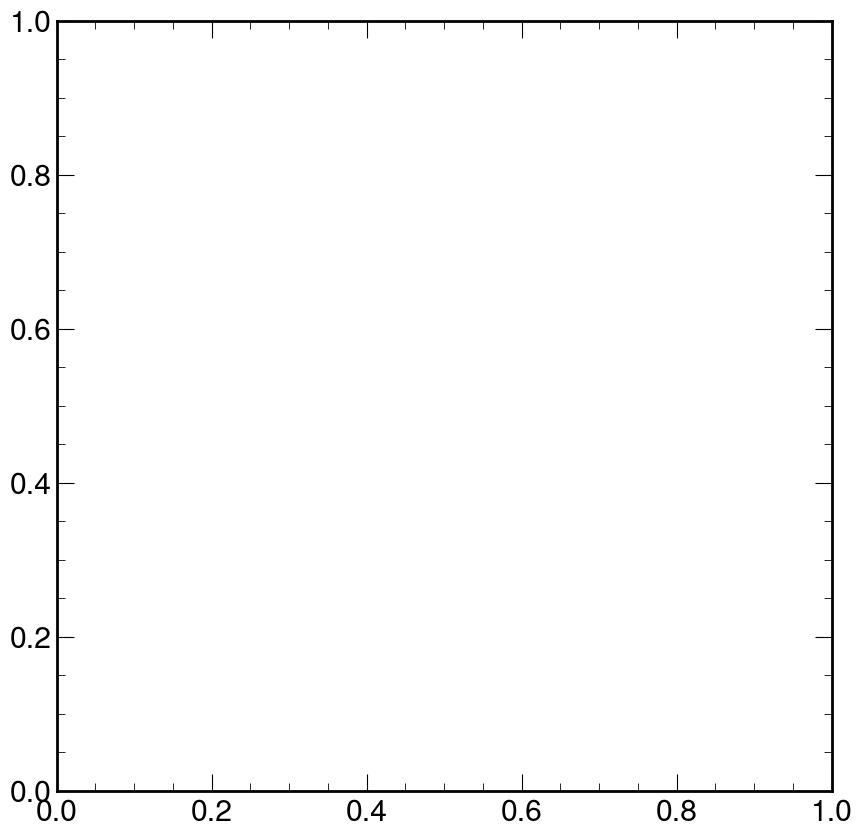

In [253]:
import matplotlib.pyplot as plt
import mplhep as hep

# Assuming you have already processed the data and stored the result in 'out' dictionary

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the histogram with color-filled bars
hep.histplot(out["jet"]["dR"], ax=ax, edgecolor='black', label='dR distribution', histtype='fill', color='blue')

# Add a legend with the title "dR distribution"
ax.legend()

# Add CMS label
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

# Show the plot
plt.show()


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation Preliminary'))

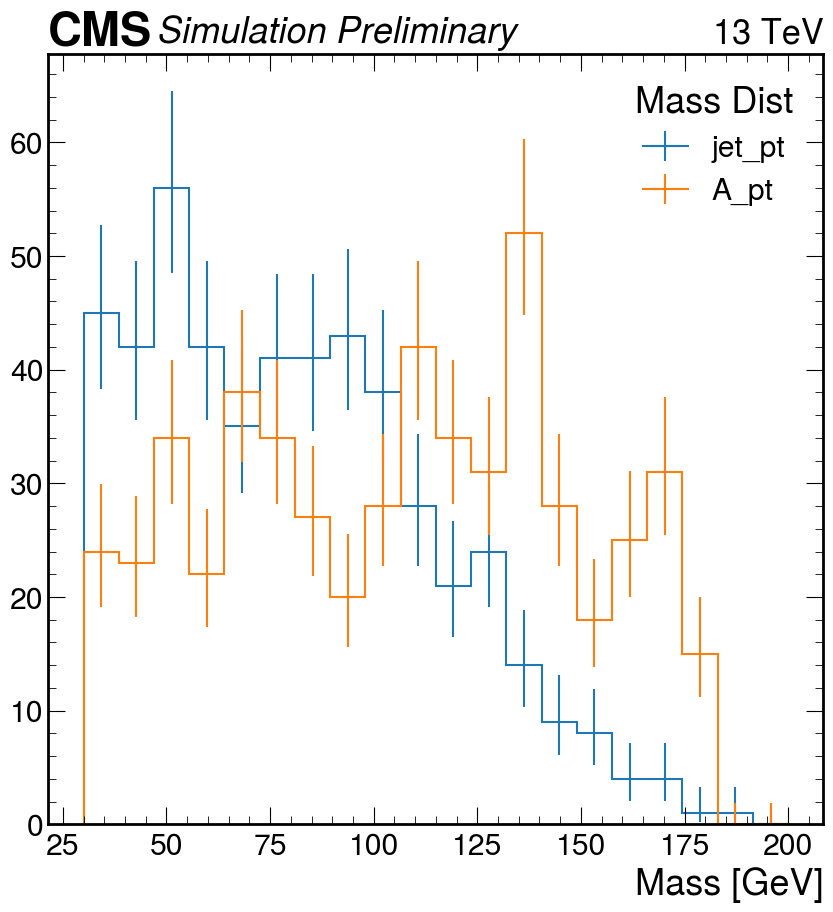

In [219]:
fig, ax = plt.subplots()
out["jet"]["jet_a_pt"].plot1d(ax=ax)
# ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

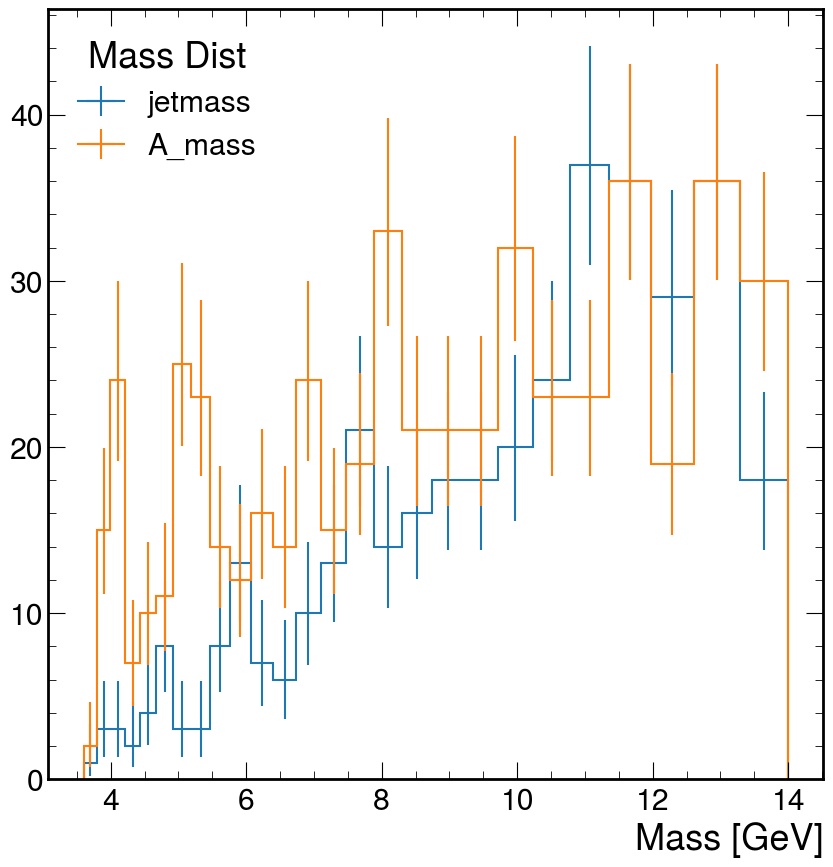

In [125]:
fileset1 = {
    'valid_mass': [
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_264.root', 
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_265.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_266.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_267.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_268.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_269.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_270.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_271.root',
        'root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_eta0To2p4_pythia8_validationML_dataset_1/Upsilon1s_ToTauTau_Hadronic_tauDR0p4_validation_dataset_1/230413_052139/0000/output_272.root',
    ],
    'train_mass':[
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_990.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_991.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_992.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_995.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_995.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_996.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_997.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_998.root",
        "root://cmseos.fnal.gov//store/group/lpcml/bbbam/Ntuples/aToTauTau_Hadronic_tauDR0p4_m3p6To16_pT30To180_ctau0To3_eta0To1p4_pythia8_unbiased4ML_dataset_1/aToTauTau_Hadronic_tauDR0p4_m3p6To14_dataset_1_reunbaised_mannual_v2/230420_051900/0000/output_999.root",
    ]
}


In [140]:
with open("aToTauTau_hadronic_train.json", "r") as fin:
    file_list_train = json.load(fin)
with open("Upsilon_TauTau_hadronic_validation.json", "r") as fin:
    file_list_valid = json.load(fin)    
    
             
fileset = {
    'train_mass': file_list_train ,
    'valid_mass': file_list_valid
                  
}


In [141]:
futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=10),
    schema=BaseSchema,
    # maxchunks=10,
)

out = futures_run(
    fileset,
    treename='/fevt/RHTree',
    # "RHTree",
    processor_instance=MyProcessor()
)
out

Output()

Output()

{'valid_mass': {'entries': 955339,
  'mass': Hist(
    StrCategory(['jetmass', 'A_mass'], name='sign'),
    Regular(26, 3.6, 14, transform=log, name='mass', label='Mass [GeV]'),
    storage=Int64()) # Sum: 1702632.0 (1917208.0 with flow)},
 'train_mass': {'entries': 356611,
  'mass': Hist(
    StrCategory(['jetmass', 'A_mass'], name='sign'),
    Regular(26, 3.6, 14, transform=log, name='mass', label='Mass [GeV]'),
    storage=Int64()) # Sum: 965830.0 (1121464.0 with flow)}}

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'))

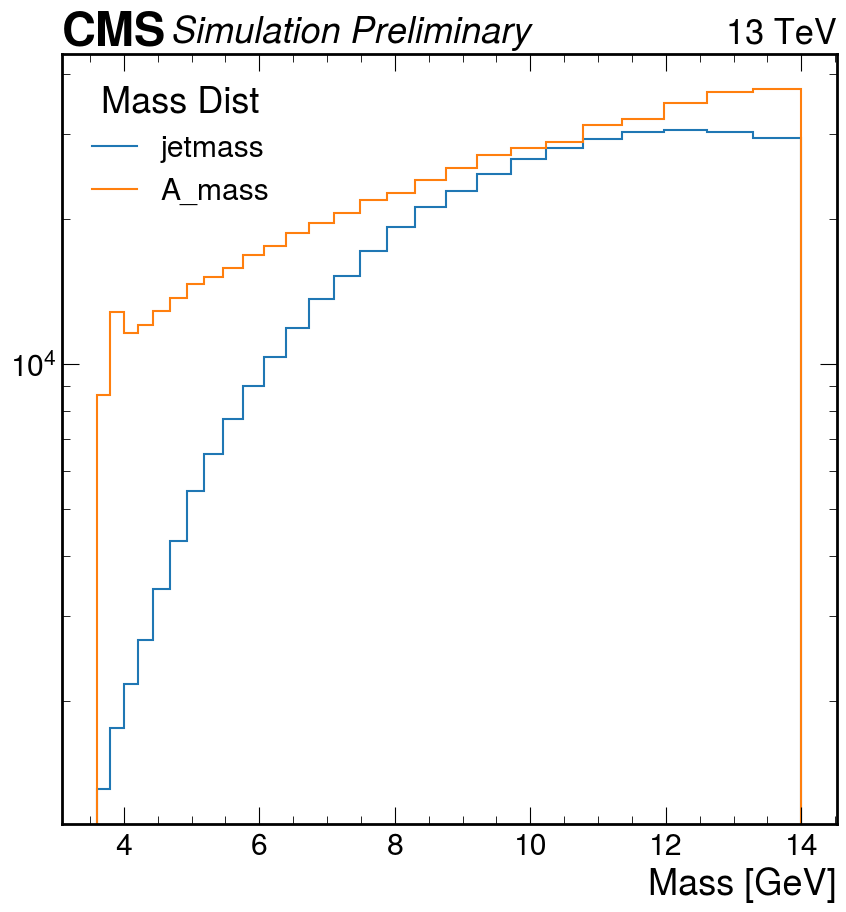

In [144]:
fig, ax = plt.subplots()
out["train_mass"]["mass"].plot1d(ax=ax)
ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation Preliminary'))

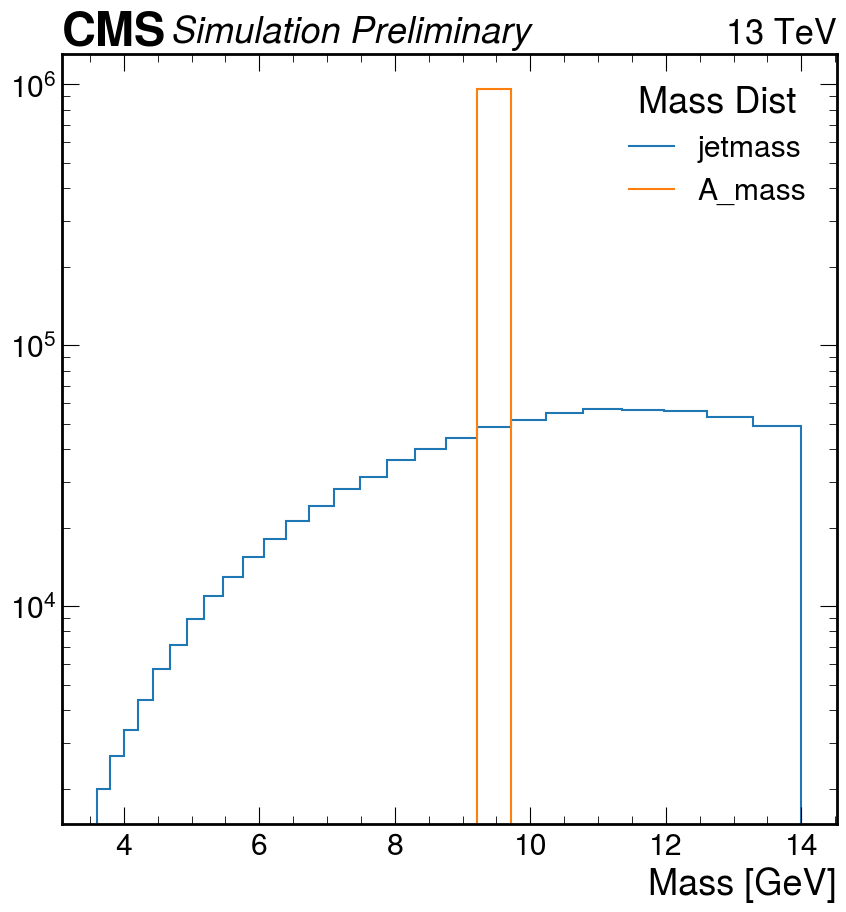

In [145]:
fig, ax = plt.subplots()
out["valid_mass"]["mass"].plot1d(ax=ax)
ax.set_yscale("log")
ax.legend(title="Mass Dist")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)